# Impacto do Crescimento do Pib sob o Comércio Internacional

### Pedro Watuhã e Vinícius Nery

In [1]:
#importando tudo que vai precisar
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

matplotlib.style.use('bmh')

In [2]:
#lendo e limpando o dataframe
df = pd.read_excel(os.path.expanduser('~/Google Drive/Grupo Mercado/Regressao/PIBExpImp.xlsx'), sheet_name = 'MDIC')
df = df.head(23)
df = df.tail(22)

df.replace("-",np.nan,inplace = True)

df['crescimento_exportacao'] = df['crescimento_exportacao'].astype('float')
df['crescimento_comercio_total'] = df['crescimento_comercio_total'].astype('float')
df['crescimento_importacao'] = df['crescimento_importacao'].astype('float')
df['crescimento_pib'] = df['crescimento_pib'].astype('float')
df['crescimento_pib_mundo'] = df['crescimento_pib_mundo'].astype('float')

In [3]:
df.corr()

,year,exportacao,crescimento_exportacao,importacao,crescimento_importacao,comercio_total_nominal,crescimento_comercio_total_nominal,inflacao,indice de preços,comercio_total,crescimento_comercio_total,crescimento_pib_mundo,crescimento_pib,dummy_crise_mundo,dummy_crise_br,dummy_recuperacao_br,dummy_recuperacao_mundo
year,1.000000,0.901473,-0.192820,0.804947,-0.028002,0.864260,-0.116203,-0.235742,0.992109,0.350313,-0.062407,-0.127358,-0.298788,0.017198,0.302725,0.249222,0.051594
exportacao,0.901473,1.000000,-0.042120,0.958378,0.205717,0.990404,0.088379,-0.307184,0.854183,0.712447,0.151897,-0.077562,-0.032113,-0.009729,0.111287,0.234689,0.137868
crescimento_exportacao,-0.192820,-0.042120,1.000000,-0.143632,0.861977,-0.091703,0.964016,-0.059017,-0.216286,0.125378,0.925055,0.647301,0.763484,-0.441334,-0.564903,0.352697,0.347409
importacao,0.804947,0.958378,-0.143632,1.000000,0.136248,0.988638,0.002905,-0.225357,0.745544,0.806138,0.063356,-0.128437,-0.038536,-0.010306,0.087727,0.168066,0.166925
crescimento_importacao,-0.028002,0.205717,0.861977,0.136248,1.000000,0.174260,0.964975,-0.341135,-0.068654,0.424691,0.977785,0.565738,0.857641,-0.362624,-0.611412,0.294061,0.380264
comercio_total_nominal,0.864260,0.990404,-0.091703,0.988638,0.174260,1.000000,0.047937,-0.270816,0.810608,0.765317,0.110640,-0.103007,-0.035561,-0.010111,0.101057,0.204915,0.153388
crescimento_comercio_total_nominal,-0.116203,0.088379,0.964016,0.002905,0.964975,0.047937,1.000000,-0.213761,-0.150632,0.295898,0.985861,0.624684,0.840245,-0.409536,-0.608183,0.338841,0.379355
inflacao,-0.235742,-0.307184,-0.059017,-0.225357,-0.341135,-0.270816,-0.213761,1.000000,-0.255169,-0.243509,-0.292744,-0.011040,-0.128491,-0.161369,0.145771,-0.218744,-0.022421
indice de preços,0.992109,0.854183,-0.216286,0.745544,-0.068654,0.810608,-0.150632,-0.255169,1.000000,0.255039,-0.096903,-0.106018,-0.363815,-0.014041,0.318823,0.239972,0.010750
comercio_total,0.350313,0.712447,0.125378,0.806138,0.424691,0.765317,0.295898,-0.243509,0.255039,1.000000,0.348773,-0.051492,0.369756,0.023723,-0.142058,0.105591,0.267542


In [4]:
#gráfico entre a taxa de crescimento do comércio e o crescimento do PIB
df["C.Exp/PIB"] = df['crescimento_exportacao']/df['crescimento_pib']
df["C.Imp/PIB"] = df['crescimento_importacao']/df['crescimento_pib']
df["C.Tot/PIB"] = df['crescimento_comercio_total']/df['crescimento_pib']

df["C.Exp/PIBM"] = df['crescimento_exportacao']/df['crescimento_pib_mundo']
df["C.Imp/PIBM"] = df['crescimento_importacao']/df['crescimento_pib_mundo']
df["C.Tot/PIBM"] = df['crescimento_comercio_total']/df['crescimento_pib_mundo']

df['cinco'] = [5 for i in range(0,22)]
df['menos_cinco'] = [-5 for i in range(0,22)]
df['zero'] = [0 for i in range(0,22)]
df.set_index('year', inplace = True)

df.loc[df['crescimento_pib'] < 0, 'dummyexp'] = df['C.Exp/PIB']
df.loc[df['crescimento_pib'] >= 0, 'dummyexp'] = 40
df.loc[df['crescimento_pib'] < 0, 'dummyimp'] = df['C.Imp/PIB']
df.loc[df['crescimento_pib'] >= 0, 'dummyimp'] = 40
df.loc[df['crescimento_pib'] < 0, 'dummytot'] = df['C.Tot/PIB']
df.loc[df['crescimento_pib'] >= 0, 'dummytot'] = 40

aexp = df.loc[df.index.values.tolist(),'dummyexp'].to_frame()
aexp.reset_index(inplace = True)
aexp['years'] = aexp['year']
aexp.set_index('years', inplace = True)

aimp = df.loc[df.index.values.tolist(),'dummyimp'].to_frame()
aimp.reset_index(inplace = True)
aimp['years'] = aimp['year']
aimp.set_index('years', inplace = True)

atot = df.loc[df.index.values.tolist(),'dummytot'].to_frame()
atot.reset_index(inplace = True)
atot['years'] = atot['year']
atot.set_index('years', inplace = True)

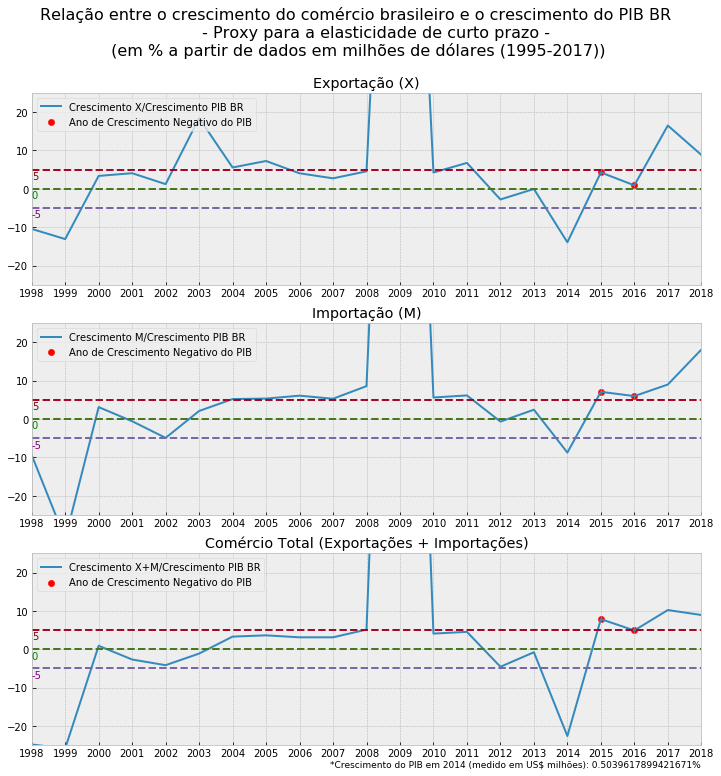

In [5]:
fig, ax = plt.subplots(nrows = 3, figsize = (12,12))
fig.suptitle("Relação entre o crescimento do comércio brasileiro e o crescimento do PIB BR\n         - Proxy para a elasticidade de curto prazo - \n (em % a partir de dados em milhões de dólares (1995-2017))", fontsize = 16, color = 'k')
fig.text(0.47, 0.1,f"*Crescimento do PIB em 2014 (medido em US$ milhões): {df.loc[2014,'crescimento_pib']*100}%", fontsize = 9)

g1 = sns.lineplot(x = df.index.values, y=df['C.Exp/PIB'], ax = ax[0], label = 'Crescimento X/Crescimento PIB BR')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[0], linestyle = '--',label='_nolegend_')
aexp.plot(kind='scatter', x = 'year', y = 'dummyexp', color='r', ax = ax[0], s = 40,label='Ano de Crescimento Negativo do PIB')
g1.legend(loc='upper left')
g1.set_title("Exportação (X)", color = 'k')
g1.set_xlabel("")
g1.set_ylabel("")
g1.set_xticks(range(1998,2019,1))
g1.set_xlim(1998,2018)
g1.set_ylim(-25,25)
g1.annotate("5",xy=(1998,2.5), color='#800000')
g1.annotate("0",xy=(1998,-2.5), color='green')
g1.annotate("-5",xy=(1998,-7.5), color='purple')

g2 = sns.lineplot(x = df.index.values, y=df['C.Imp/PIB'], ax = ax[1], label = 'Crescimento M/Crescimento PIB BR')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[1], linestyle = '--',label='_nolegend_')
aimp.plot(kind='scatter', x = 'year', y = 'dummyimp', color='r', ax = ax[1], s = 40,label='Ano de Crescimento Negativo do PIB')
g2.legend(loc='upper left')
g2.set_title("Importação (M)",color = 'k')
g2.set_xlabel("")
g2.set_ylabel("")
g2.set_xticks(range(1998,2019,1))
g2.set_ylim(-25,25)
g2.set_xlim(1998,2018)
g2.annotate("5",xy=(1998,2.5), color='#800000')
g2.annotate("0",xy=(1998,-2.5), color='green')
g2.annotate("-5",xy=(1998,-7.5), color='purple')

g3 = sns.lineplot(x = df.index.values, y=df['C.Tot/PIB'], ax = ax[2],label='Crescimento X+M/Crescimento PIB BR')
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax[2], linestyle = '--',label='_nolegend_')
atot.plot(kind='scatter', x = 'year', y = 'dummytot', color='r', ax = ax[2], s = 40,label='Ano de Crescimento Negativo do PIB')
g3.legend(loc='upper left')
g3.set_title("Comércio Total (Exportações + Importações)", color = 'k')
g3.set_xlabel("")
g3.set_ylabel("")
g3.set_xticks(range(1998,2019,1))
g3.set_ylim(-25,25)
g3.set_xlim(1998,2018)
g3.annotate("5",xy=(1998,2.5), color='#800000')
g3.annotate("0",xy=(1998,-2.5), color='green')
g3.annotate("-5",xy=(1998,-7.5), color='purple')

#plt.savefig("Elasticidade PIB-Comércio no Brasil.png", dpi = 300)
plt.show()

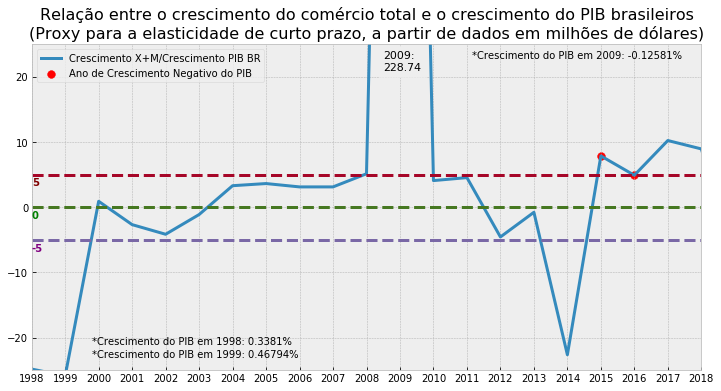

In [6]:
fig, ax = plt.subplots(nrows = 1, figsize = (12,6))

g = sns.lineplot(x = df.index.values, y=df['C.Tot/PIB'], ax = ax,label='Crescimento X+M/Crescimento PIB BR', linewidth = 3)
df.loc[df.index.values.tolist(),'cinco'].plot(kind = 'line',ax=ax, linestyle = '--',label='_nolegend_', linewidth = 3)
df.loc[df.index.values.tolist(),'menos_cinco'].plot(kind = 'line',ax=ax, linestyle = '--',label='_nolegend_', linewidth = 3)
df.loc[df.index.values.tolist(),'zero'].plot(kind = 'line',ax=ax, linestyle = '--',label='_nolegend_', linewidth = 3)
atot.plot(kind='scatter', x = 'year', y = 'dummytot', color='r', ax = ax, s = 60,label='Ano de Crescimento Negativo do PIB')
g.legend(loc='upper left')
g.set_title("Relação entre o crescimento do comércio total e o crescimento do PIB brasileiros\n(Proxy para a elasticidade de curto prazo, a partir de dados em milhões de dólares)", fontsize = 16, color = 'k')
g.set_xlabel("")
g.set_ylabel("")
g.set_xticks(range(1998,2019,1))
g.set_ylim(-25,25)
g.set_xlim(1998,2018)
g.annotate("5",xy=(1998,3.3), color='#800000', weight = 'bold')
g.annotate("0",xy=(1998,-1.7), color='green', weight = 'bold')
g.annotate("-5",xy=(1998,-6.7), color='purple', weight = 'bold')
g.annotate(f"2009:\n{round(df.loc[2009,'C.Tot/PIB'],2)}", xy = (2008.5,21), backgroundcolor = '#eeeeee', fontsize = 11)
g.annotate(f"*Crescimento do PIB em 2009: {round(df.loc[2009,'crescimento_pib']*100,5)}%", xy = (2011.15,22.8),fontsize = 10)
g.annotate(f"*Crescimento do PIB em 1998: {round(df.loc[1998,'crescimento_pib']*100,5)}%", xy = (1999.8,-21),fontsize = 10)
g.annotate(f"*Crescimento do PIB em 1999: {round(df.loc[1999,'crescimento_pib']*100,5)}%", xy = (1999.8,-23),fontsize = 10)

#plt.savefig("Proxy para a Elasticidade PIB-Comércio Total Brasileiro.png", dpi = 300)
plt.show()

Text(0.055, -0.7, 'Correlação do crescimento do PIB Mundo com:\nCrescimento do comércio total: 0.603\nCrescimento das exportações: 0.647\nCrescimento das importações: 0.566\n\nValor do desvio-padrão: 2.243\nP-valor: 0.0029645752\nIntervalo de confiança da regressão: 95%\n\nVale lembrar que o gráfico ao lado é\napenas uma proxy da relação entre as\nduas variáveis, sem alguns dos controles\npara outras variáveis que afetam a relação.\n\n\n\n*Os dados de PIB utilizados foram aqueles\nde PIB real, medido em milhões de dólares.')

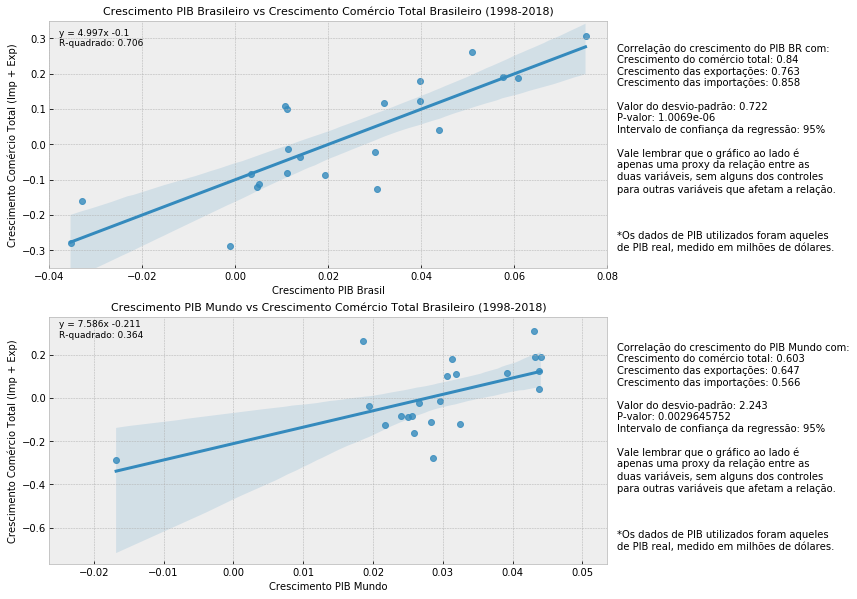

In [7]:
#criando um objeto de regressão linear
lmbr = LinearRegression()
lmmundo = LinearRegression()

#criando variáveis e determinando o modelo
xbr = df[['crescimento_pib']]
xmundo = df[['crescimento_pib_mundo']]
y = df['crescimento_comercio_total']

lmbr.fit(xbr,y)
lmmundo.fit(xmundo,y)
yhatbr = lmbr.predict(xbr)
yhatmundo = lmmundo.predict(xmundo)

#tomando as estatísticas
slope, intercept, r_value, p_value, std_err = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df['crescimento_pib'],df['crescimento_exportacao'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df['crescimento_pib'],df['crescimento_importacao'])

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_exportacao'])
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_importacao'])

#plottando o gráfico

fig, (ax1,ax2) = plt.subplots(nrows = 2, figsize = (10,10))

sns.regplot(xbr,y, ax = ax1)
ax1.annotate(f'y = {round(lmbr.coef_[0],3)}x {round(lmbr.intercept_,3)}\nR-quadrado: {round(lmbr.score(xbr,y),3)}',xy=(-0.038,0.28),fontsize = 9)
ax1.set_ylabel("Crescimento Comércio Total (Imp + Exp)",fontsize = 10)
ax1.set_xlabel("Crescimento PIB Brasil",fontsize = 10)
ax1.set_title("Crescimento PIB Brasileiro vs Crescimento Comércio Total Brasileiro (1998-2018)",fontsize = 11)
ax1.set_xlim(-0.04,0.08)
ax1.set_ylim(-0.35,0.35)

ax1.text(0.082,-0.3, f"Correlação do crescimento do PIB BR com:\nCrescimento do comércio total: {round(r_value,3)}\nCrescimento das exportações: {round(r_value1,3)}\nCrescimento das importações: {round(r_value2,3)}\n\nValor do desvio-padrão: {round(std_err,3)}\nP-valor: {round(p_value,10)}\nIntervalo de confiança da regressão: 95%\n\nVale lembrar que o gráfico ao lado é\napenas uma proxy da relação entre as\nduas variáveis, sem alguns dos controles\npara outras variáveis que afetam a relação.\n\n\n\n*Os dados de PIB utilizados foram aqueles\nde PIB real, medido em milhões de dólares.", fontsize = 10)

sns.regplot(xmundo,y, ax = ax2)
ax2.annotate(f'y = {round(lmmundo.coef_[0],3)}x {round(lmmundo.intercept_,3)}\nR-quadrado: {round(lmmundo.score(xmundo,y),3)}',xy=(-0.025,0.28),fontsize = 9)
ax2.set_ylabel("Crescimento Comércio Total (Imp + Exp)",fontsize = 10)
ax2.set_xlabel("Crescimento PIB Mundo",fontsize = 10)
ax2.set_title("Crescimento PIB Mundo vs Crescimento Comércio Total Brasileiro (1998-2018)",fontsize = 11)

ax2.text(0.055,-0.7, f"Correlação do crescimento do PIB Mundo com:\nCrescimento do comércio total: {round(r_value3,3)}\nCrescimento das exportações: {round(r_value4,3)}\nCrescimento das importações: {round(r_value5,3)}\n\nValor do desvio-padrão: {round(std_err3,3)}\nP-valor: {round(p_value3,10)}\nIntervalo de confiança da regressão: 95%\n\nVale lembrar que o gráfico ao lado é\napenas uma proxy da relação entre as\nduas variáveis, sem alguns dos controles\npara outras variáveis que afetam a relação.\n\n\n\n*Os dados de PIB utilizados foram aqueles\nde PIB real, medido em milhões de dólares.", fontsize = 10)

#plt.savefig("Modelos de RLS.png", dpi = 300)

(0, 6)

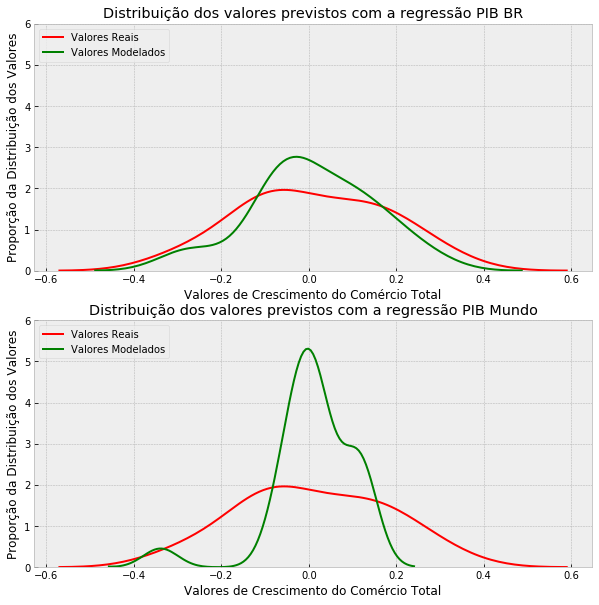

In [8]:
fig, (ax3,ax4) = plt.subplots(nrows = 2, figsize = (10,10))

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais', ax = ax3)
sns.distplot(yhatbr, hist = False, color = 'g', label = 'Valores Modelados', ax = ax3)
ax3.legend(loc='upper left')
ax3.set_xlabel("Valores de Crescimento do Comércio Total")
ax3.set_ylabel("Proporção da Distribuição dos Valores")
ax3.set_title("Distribuição dos valores previstos com a regressão PIB BR")
ax3.set_ylim(0,6)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais', ax = ax4)
sns.distplot(yhatmundo, hist = False, color = 'g', label = 'Valores Modelados', ax = ax4)
ax4.legend(loc='upper left')
ax4.set_xlabel("Valores de Crescimento do Comércio Total")
ax4.set_ylabel("Proporção da Distribuição dos Valores")
ax4.set_title("Distribuição dos valores previstos com a regressão PIB Mundo")
ax4.set_ylim(0,6)

#plt.savefig("Distribuição dos modelos de RLS.png", dpi = 300)

Significância do coeficiente referente ao PIB Brasileiro:
	P-valor: 1.0068545002288153e-06
	Desvio-Padrão:0.7217529690780567

Significância do coeficiente referente ao PIB Mundial:
	P-valor: 0.002964575236367176
	Desvio-Padrão:2.243302502882925

Significância do coeficiente referente à dummy da crise de 2009:
	P-valor: 0.06368872178622954
	Desvio-Padrão:0.15840525882966203


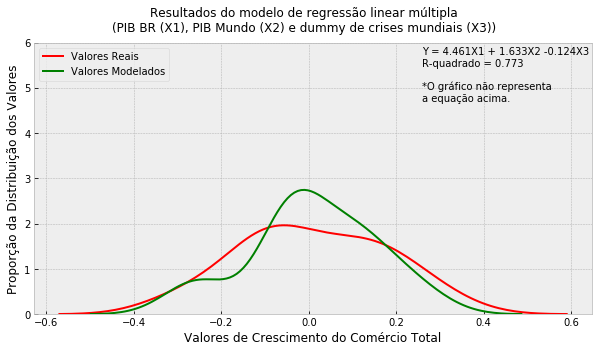

In [9]:
#regressao múltipla com três fatores (crise apenas em 2009)
mlm = LinearRegression()

xm = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise_mundo']]
ym = df['crescimento_comercio_total']

mlm.fit(xm,ym)
yhatm = mlm.predict(xm)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2) e dummy de crises mundiais (X3))", fontsize = 12)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.26,4.7,f"Y = {round(mlm.coef_[0],3)}X1 + {round(mlm.coef_[1],3)}X2 {round(mlm.coef_[2],3)}X3\nR-quadrado = {round(mlm.score(xm,ym),3)}\n\n*O gráfico não representa\na equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise_mundo'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy da crise de 2009:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")
#plt.savefig("Distribuição do modelo de RLM.png", dpi = 300)

Significância do coeficiente referente ao PIB Brasileiro:
	P-valor: 1.0068545002288153e-06
	Desvio-Padrão:0.7217529690780567

Significância do coeficiente referente ao PIB Mundial:
	P-valor: 0.002964575236367176
	Desvio-Padrão:2.243302502882925

Significância do coeficiente referente à dummy de crise:
	P-valor: 0.002032308520989662
	Desvio-Padrão:0.08228815290625528


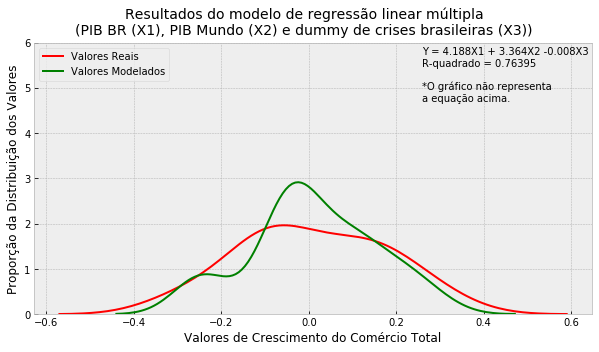

In [10]:
#regressao múltipla com três fatores (crises em 2009,2015 e 2016)
mlm2 = LinearRegression()

xm2 = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise_br']]
ym2 = df['crescimento_comercio_total']

mlm2.fit(xm2,ym2)
yhatm2 = mlm2.predict(xm2)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2) e dummy de crises brasileiras (X3))", fontsize = 14)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm2, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.26,4.7,f"Y = {round(mlm2.coef_[0],3)}X1 + {round(mlm2.coef_[1],3)}X2 {round(mlm2.coef_[2],3)}X3\nR-quadrado = {round(mlm2.score(xm2,ym2),5)}\n\n*O gráfico não representa\na equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise_br'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")
#plt.savefig("Distribuição do modelo de RLM.png", dpi = 300)

Significância do coeficiente referente ao PIB Brasileiro:
	P-valor: 1.0068545002288153e-06
	Desvio-Padrão:0.7217529690780567

Significância do coeficiente referente ao PIB Mundial:
	P-valor: 0.002964575236367176
	Desvio-Padrão:2.243302502882925

Significância do coeficiente referente à dummy de crise:
	P-valor: 0.002032308520989662
	Desvio-Padrão:0.08228815290625528

Significância do coeficiente referente à dummy de recuperação:
	P-valor: 0.0722829102469599
	Desvio-Padrão:0.11538928929575065


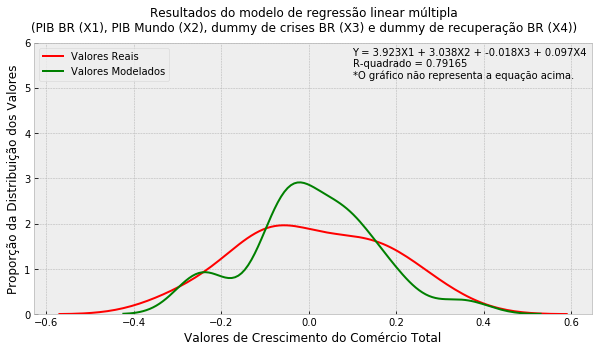

In [11]:
#fazendo um modelo com a dummy de recuperação (brasil)
mlm3 = LinearRegression()

xm3 = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise_br','dummy_recuperacao_br']]
ym3 = df['crescimento_comercio_total']

mlm3.fit(xm3,ym3)
yhatm3 = mlm3.predict(xm3)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2), dummy de crises BR (X3) e dummy de recuperação BR (X4))", fontsize = 12)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm3, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.1,5.2,f"Y = {round(mlm3.coef_[0],3)}X1 + {round(mlm3.coef_[1],3)}X2 + {round(mlm3.coef_[2],3)}X3 + {round(mlm3.coef_[3],3)}X4\nR-quadrado = {round(mlm3.score(xm3,ym3),5)}\n*O gráfico não representa a equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise_br'],df['crescimento_comercio_total'])
slopeRECUPERACAO, interceptRECUPERACAO, r_valueRECUPERACAO, p_valueRECUPERACAO, std_errRECUPERACAO = stats.linregress(df['dummy_recuperacao_br'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")
print(f"\nSignificância do coeficiente referente à dummy de recuperação:\n\tP-valor: {p_valueRECUPERACAO}\n\tDesvio-Padrão:{std_errRECUPERACAO}")

Text(0.1, 5.2, 'Y = 4.052X1 + 3.171X2 + 0.096X3\nR-quadrado = 0.79088\n*O gráfico não representa a equação acima.')

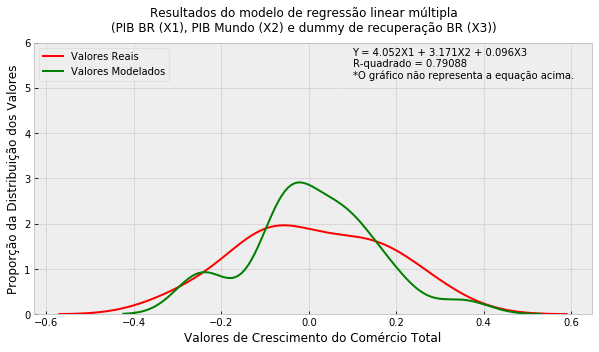

In [12]:
#fazendo um modelo apenas com a dummy_recuperacao_br
#fazendo um modelo com a dummy de recuperação (brasil)
mlm_recbr = LinearRegression()

xm_recbr = df[['crescimento_pib','crescimento_pib_mundo','dummy_recuperacao_br']]
ym_recbr = df['crescimento_comercio_total']

mlm_recbr.fit(xm_recbr,ym_recbr)
yhatm_recbr = mlm_recbr.predict(xm_recbr)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2) e dummy de recuperação BR (X3))", fontsize = 12)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm3, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.1,5.2,f"Y = {round(mlm_recbr.coef_[0],3)}X1 + {round(mlm_recbr.coef_[1],3)}X2 + {round(mlm_recbr.coef_[2],3)}X3\nR-quadrado = {round(mlm_recbr.score(xm_recbr,ym_recbr),5)}\n*O gráfico não representa a equação acima.")

Significância do coeficiente referente ao PIB Brasileiro:
	P-valor: 1.0068545002288153e-06
	Desvio-Padrão:0.7217529690780567

Significância do coeficiente referente ao PIB Mundial:
	P-valor: 0.002964575236367176
	Desvio-Padrão:2.243302502882925

Significância do coeficiente referente à dummy de crise:
	P-valor: 0.06368872178622954
	Desvio-Padrão:0.15840525882966203

Significância do coeficiente referente à dummy de recuperação:
	P-valor: 0.062176433589281384
	Desvio-Padrão:0.15824413120953384


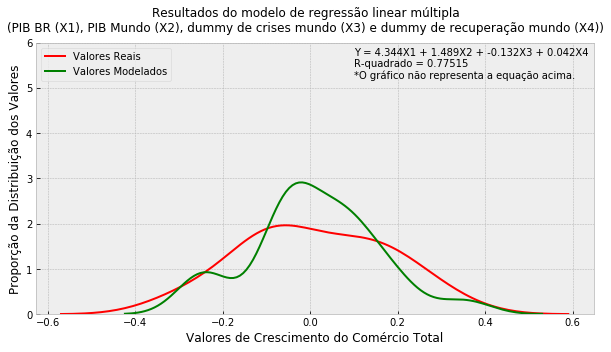

In [13]:
#fazendo um modelo com a dummy de recuperação (mundo)
mlm4 = LinearRegression()

xm4 = df[['crescimento_pib','crescimento_pib_mundo','dummy_crise_mundo','dummy_recuperacao_mundo']]
ym4 = df['crescimento_comercio_total']

mlm4.fit(xm4,ym4)
yhatm4 = mlm4.predict(xm4)

fig,ax = plt.subplots(nrows = 1, figsize =(10,5))

fig.suptitle("Resultados do modelo de regressão linear múltipla\n(PIB BR (X1), PIB Mundo (X2), dummy de crises mundo (X3) e dummy de recuperação mundo (X4))", fontsize = 12)

sns.distplot(df['crescimento_comercio_total'], hist = False, color = 'r', label = 'Valores Reais')
sns.distplot(yhatm3, hist = False, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")
ax.set_ylabel("Proporção da Distribuição dos Valores")
ax.set_ylim(0,6)
ax.text(0.1,5.2,f"Y = {round(mlm4.coef_[0],3)}X1 + {round(mlm4.coef_[1],3)}X2 + {round(mlm4.coef_[2],3)}X3 + {round(mlm4.coef_[3],3)}X4\nR-quadrado = {round(mlm4.score(xm4,ym4),5)}\n*O gráfico não representa a equação acima.")

slopePIBBR, interceptPIBBR, r_valuePIBBR, p_valuePIBBR, std_errPIBBR = stats.linregress(df['crescimento_pib'],df['crescimento_comercio_total'])
slopePIBMUNDO, interceptPIBMUNDO, r_valuePIBMUNDO, p_valuePIBMUNDO, std_errPIBMUNDO = stats.linregress(df['crescimento_pib_mundo'],df['crescimento_comercio_total'])
slopeDUMMY, interceptDUMMY, r_valueDUMMY, p_valueDUMMY, std_errDUMMY = stats.linregress(df['dummy_crise_mundo'],df['crescimento_comercio_total'])
slopeRECUPERACAO, interceptRECUPERACAO, r_valueRECUPERACAO, p_valueRECUPERACAO, std_errRECUPERACAO = stats.linregress(df['dummy_recuperacao_mundo'],df['crescimento_comercio_total'])

print(f"Significância do coeficiente referente ao PIB Brasileiro:\n\tP-valor: {p_valuePIBBR}\n\tDesvio-Padrão:{std_errPIBBR}")
print(f"\nSignificância do coeficiente referente ao PIB Mundial:\n\tP-valor: {p_valuePIBMUNDO}\n\tDesvio-Padrão:{std_errPIBMUNDO}")
print(f"\nSignificância do coeficiente referente à dummy de crise:\n\tP-valor: {p_valueDUMMY}\n\tDesvio-Padrão:{std_errDUMMY}")
print(f"\nSignificância do coeficiente referente à dummy de recuperação:\n\tP-valor: {p_valueRECUPERACAO}\n\tDesvio-Padrão:{std_errRECUPERACAO}")

**Previsões para o desempenho do comércio total em 2020 e 2021**

In [14]:
#previsões de PIB Brasil
fmibr20 = -0.053 #14/4
fmibr21 = 0.029
eiubr20 = -0.055 #26/3
bancomundialbr20 = -0.05 #13/4
iifbr20 = -0.04 #13/4
focusbr20 = -0.0411 #8/5
focusbr21 = 0.032
govbr20 = -0.047

fmimundo20 = -0.03
fmimundo21 = 0.058

projecoes_brasil_2020 = [fmibr20,eiubr20,bancomundialbr20,iifbr20,focusbr20,govbr20]
projecoes_brasil_2021 = [fmibr21,focusbr21]

#calculando as médias das projeções para o brasil 2020
previsao_pibbr_2020 = np.mean(projecoes_brasil_2020)
previsao_pibbr_2021 = np.mean(projecoes_brasil_2021)

print(f"Média das previsões para o PIB Brasileiro em 2020: {round(previsao_pibbr_2020*100,3)}%")
print(f"Média das previsões para o PIB Brasileiro em 2021: {round(previsao_pibbr_2021*100,3)}%")
print(f"Previsão do FMI para o PIB Mundial em 2020: {fmimundo20*100}%")
print(f"Previsão do FMI para o PIB Mundial em 2021: {round(fmimundo21*100,2)}%")

Média das previsões para o PIB Brasileiro em 2020: -4.768%
Média das previsões para o PIB Brasileiro em 2021: 3.05%
Previsão do FMI para o PIB Mundial em 2020: -3.0%
Previsão do FMI para o PIB Mundial em 2021: 5.8%


In [34]:
#previsões atualizados do PIB Brasil
fmibr120 = -0.091
fmibr121 = 0.036
govbr120 = -0.047
focusbr120 = -0.0577 #27/7
focusbr121 = 0.035 #27/7
ifi20 = -0.0653
ifi21 = 0.0246

fmimundo120 = -0.049
fmimundo121 = 0.054

projecoes_brasil1_2020 = [fmibr120, focusbr120, govbr120, ifi20]
projecoes_brasil1_2021 = [fmibr121, focusbr121, ifi21]

#calculando as médias das projeções para o brasil 2020
previsao_pibbr_12020 = np.mean(projecoes_brasil1_2020)
previsao_pibbr_12021 = np.mean(projecoes_brasil1_2021)

print(f"Média das previsões mais recentes para o PIB Brasileiro em 2020: {round(previsao_pibbr_12020*100,3)}%")
print(f"Média das previsões mais recentes para o PIB Brasileiro em 2021: {round(previsao_pibbr_12021*100,3)}%")
print(f"Previsão mais recente do FMI para o PIB Mundial em 2020: {fmimundo120*100}%")
print(f"Previsão mais recente do FMI para o PIB Mundial em 2021: {round(fmimundo121*100,2)}%")

Média das previsões mais recentes para o PIB Brasileiro em 2020: -6.525%
Média das previsões mais recentes para o PIB Brasileiro em 2021: 3.187%
Previsão mais recente do FMI para o PIB Mundial em 2020: -4.9%
Previsão mais recente do FMI para o PIB Mundial em 2021: 5.4%


In [25]:
#Regressão Linear Simples (PIB BR)
previsao_rls_pibbr_2020 = lmbr.predict([[previsao_pibbr_2020]])
previsao_rls_pibbr_2021 = lmbr.predict([[previsao_pibbr_2021]])
previsao_rls_pibbr_12020 = lmbr.predict([[previsao_pibbr_12020]])
previsao_rls_pibbr_12021 = lmbr.predict([[previsao_pibbr_12021]])

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rls_pibbr_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rls_pibbr_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rls_pibbr_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rls_pibbr_12021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -33.85%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 5.221%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -42.628%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 5.903%


In [26]:
#Regressão Linear Simples (PIB Mundo)
previsao_rls_pibmundo_2020 = lmmundo.predict([[fmimundo20]])
previsao_rls_pibmundo_2021 = lmmundo.predict([[fmimundo21]])
previsao_rls_pibmundo_12020 = lmmundo.predict([[fmimundo120]])
previsao_rls_pibmundo_12021 = lmmundo.predict([[fmimundo121]])

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rls_pibmundo_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rls_pibmundo_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rls_pibmundo_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rls_pibmundo_12021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -43.907%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 22.849%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -58.32%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 19.815%


In [27]:
#Regressão Linear Múltipla (com dummy_crise_mundo = 1)
rlm1_2020 = np.array([[previsao_pibbr_2020,fmimundo20,1]])
rlm1_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0]])
rlm1_12020 = np.array([[previsao_pibbr_12020,fmimundo120,1]])
rlm1_12021 = np.array([[previsao_pibbr_12021,fmimundo121,0]])

previsao_rlm_d1_2020 = mlm.predict(rlm1_2020)
previsao_rlm_d1_2021 = mlm.predict(rlm1_2021)
previsao_rlm_d1_12020 = mlm.predict(rlm1_12020)
previsao_rlm_d1_12021 = mlm.predict(rlm1_12021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d1_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d1_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d1_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d1_12021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -51.645%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 10.048%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -62.585%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 10.004%


In [28]:
#Regressão Linear Múltipla (com dummy_crise_br = 1)
rlm2_2020 = np.array([[previsao_pibbr_2020,fmimundo20,1]])
rlm2_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0]])
rlm2_12020 = np.array([[previsao_pibbr_12020,fmimundo120,1]])
rlm2_12021 = np.array([[previsao_pibbr_12021,fmimundo121,0]])

previsao_rlm_d2_2020 = mlm2.predict(rlm2_2020)
previsao_rlm_d2_2021 = mlm2.predict(rlm2_2021)
previsao_rlm_d2_12020 = mlm2.predict(rlm2_12020)
previsao_rlm_d2_12021 = mlm2.predict(rlm2_12021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d2_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d2_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d2_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d2_12021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -48.83%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 14.369%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -62.579%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 13.596%


Previsão do desempenho do comércio exterior total do Brasil em 2020: -46.796%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 22.17%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -59.46%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 21.491%


Text(0.5, 0, 'Valores de Crescimento do Comércio Total')

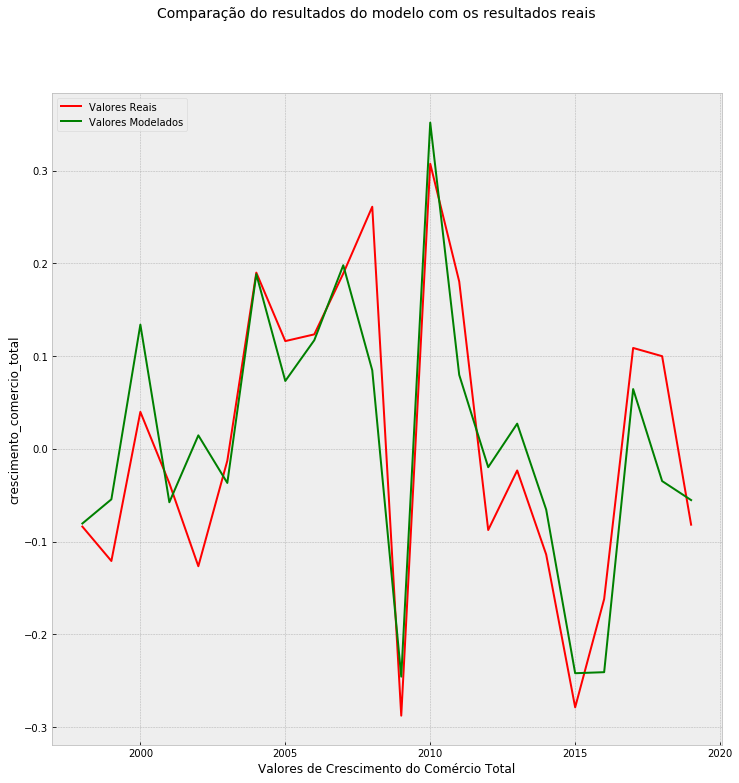

In [37]:
#Regressão Linear Múltipla com Recuperação (dummy_crise_br = 1, dummy_recuperacao_br = 1)
rlm3_2020 = np.array([[previsao_pibbr_2020,fmimundo20,1,0]])
rlm3_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0,1]])
rlm3_12020 = np.array([[previsao_pibbr_12020,fmimundo120,1,0]])
rlm3_12021 = np.array([[previsao_pibbr_12021,fmimundo121,0,1]])

previsao_rlm_d3_2020 = mlm3.predict(rlm3_2020)
previsao_rlm_d3_2021 = mlm3.predict(rlm3_2021)
previsao_rlm_d3_12020 = mlm3.predict(rlm3_12020)
previsao_rlm_d3_12021 = mlm3.predict(rlm3_12021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d3_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d3_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d3_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d3_12021[0]*100,3)}%")

fig, ax = plt.subplots(figsize=(12,12))

fig.suptitle("Comparação do resultados do modelo com os resultados reais", fontsize = 14)

sns.lineplot(x = df.index, y = df['crescimento_comercio_total'], color = 'r', label = 'Valores Reais')
sns.lineplot(x = df.index, y = yhatm3, color = 'g', label = 'Valores Modelados')
ax.legend(loc='upper left')
ax.set_xlabel("Valores de Crescimento do Comércio Total")

In [30]:
#Regressão Linear Múltipla apenas com Recuperação (dummy_recuperacao_br = 1)
rlm_recbr_2020 = np.array([[previsao_pibbr_2020,fmimundo20,0]])
rlm_recbr_2021 = np.array([[previsao_pibbr_2021,fmimundo21,1]])
rlm_recbr_12020 = np.array([[previsao_pibbr_12020,fmimundo120,0]])
rlm_recbr_12021 = np.array([[previsao_pibbr_12021,fmimundo121,1]])

previsao_rlm_recbr_2020 = mlm_recbr.predict(rlm_recbr_2020)
previsao_rlm_recbr_2021 = mlm_recbr.predict(rlm_recbr_2021)
previsao_rlm_recbr_12020 = mlm_recbr.predict(rlm_recbr_12020)
previsao_rlm_recbr_12021 = mlm_recbr.predict(rlm_recbr_12021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_recbr_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_recbr_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_recbr_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_recbr_12021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -46.876%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 22.283%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -60.018%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 21.568%


In [31]:
#Regressão Linear Múltipla com Recuperação (dummy_crise_mundo = 1, dummy_recuperacao_mundo = 1)
rlm4_2020 = np.array([[previsao_pibbr_2020,fmimundo20,1,0]])
rlm4_2021 = np.array([[previsao_pibbr_2021,fmimundo21,0,1]])
rlm4_12020 = np.array([[previsao_pibbr_12020,fmimundo120,1,0]])
rlm4_12021 = np.array([[previsao_pibbr_12021,fmimundo121,0,1]])

previsao_rlm_d4_2020 = mlm4.predict(rlm4_2020)
previsao_rlm_d4_2021 = mlm4.predict(rlm4_2021)
previsao_rlm_d4_12020 = mlm4.predict(rlm4_12020)
previsao_rlm_d4_12021 = mlm4.predict(rlm4_12021)

print (f"Previsão do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d4_2020[0]*100,3)}%")
print (f"Previsão do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d4_2021[0]*100,3)}%")
print (f"\nPrevisão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_d4_12020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_d4_12021[0]*100,3)}%")

Previsão do desempenho do comércio exterior total do Brasil em 2020: -50.912%
Previsão do desempenho do comércio exterior total do Brasil em 2021: 13.528%

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -61.373%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 13.526%


In [32]:
mlm_simples = LinearRegression()
x = df[['crescimento_pib','crescimento_pib_mundo']]
y = df['crescimento_comercio_total']

mlm_simples.fit(x,y)
mlm_simples.predict(x)

rlmsimples_2020 = np.array([[previsao_pibbr_12020,fmimundo120]])
rlmsimples_2021 = np.array([[previsao_pibbr_12021,fmimundo121]])
previsao_rlm_simples_2020 = mlm_simples.predict(rlmsimples_2020)
previsao_rlm_simples_2021 = mlm_simples.predict(rlmsimples_2021)

print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: {round(previsao_rlm_simples_2020[0]*100,3)}%")
print (f"Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: {round(previsao_rlm_simples_2021[0]*100,3)}%")

Previsão atualizada do desempenho do comércio exterior total do Brasil em 2020: -62.817%
Previsão atualizada do desempenho do comércio exterior total do Brasil em 2021: 13.686%


Previsões da OMC:

Mundo (2020): de - 12,9% a -31,9% no comércio total

Dados a seguir nos cenários respectivos: recuperação em V, recuperação em U, recuperação em L

Brasil (2020): de -8% a -16,8% a -20,2% nas exportações

Brasil (2021): de 6,2% a 14,3% a 6,1% nas exportações

Correlação do crescimento do comércio total brasileiro com o crescimento das exportações brasileiras: 0,96

https://www.correiobraziliense.com.br/app/noticia/economia/2020/04/09/internas_economia,843311/catastrofe-no-comercio-global-omc-estima-perdas-na-economia-brasileir.shtml

https://g1.globo.com/economia/noticia/2020/06/23/omc-projeta-tombo-de-185percent-no-comercio-mundial-no-2o-trimestre-mas-ve-cenario-menos-pessimista-para-o-ano.ghtml

https://www.wto.org/english/news_e/pres20_e/pr855_e.htm

https://www.wto.org/english/news_e/pres20_e/methodpr855_e.pdf seção 3.1, tabela 6



In [1]:
#Pedro Watuhã https://github.com/pedrowatuha
#Vinícius Nery https://github.com/vnery5